#  Notebook to accompany Lecture 20

Today we will start looking at images in python. Most of the image manipulation that we're interested in can be carried out using scikit-image. This package is found here:

https://scikit-image.org/

and there is a good set of introductory examples here:

https://scipy-lectures.org/packages/scikit-image/index.html

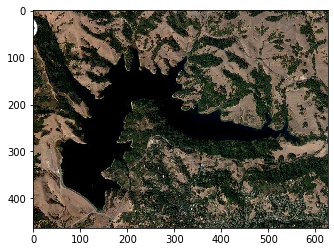

In [11]:
import os
from skimage import io
import skimage
import matplotlib.pyplot as plt
import skimage.filters as filters

briones = io.imread('../lab7/briones.tiff') # path to Briones image from lab 7
plt.figure()
plt.imshow(briones)
plt.show()

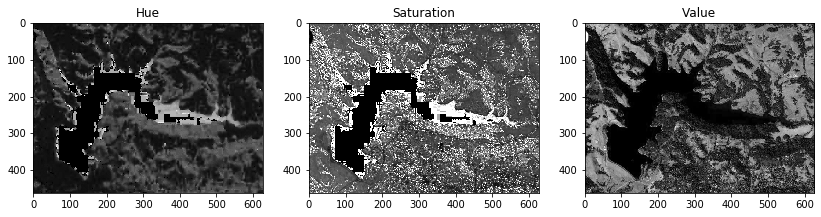

In [12]:
# demonstrate conversion to HSV colorspace
from skimage.color import rgb2hsv
briones_hsv = rgb2hsv(briones[:,:,:-1])
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.imshow(briones_hsv[:,:,0],cmap='gray')
plt.title('Hue')
plt.subplot(1,3,2)
plt.imshow(briones_hsv[:,:,1],cmap='gray')
plt.title('Saturation')
plt.subplot(1,3,3)
plt.imshow(briones_hsv[:,:,2],cmap='gray')
plt.title('Value')
plt.show()

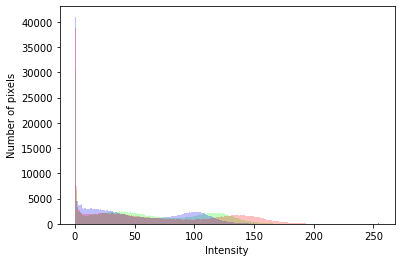

In [13]:
# Demonstrate R,G,B histogram
plt.figure()
plt.hist(briones[:,:,1].ravel(),256,color=[0, 1, 0, 0.25])
plt.hist(briones[:,:,2].ravel(),256,color=[0, 0, 1, 0.25])
plt.hist(briones[:,:,0].ravel(),256,color=[1, 0, 0, 0.25])
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

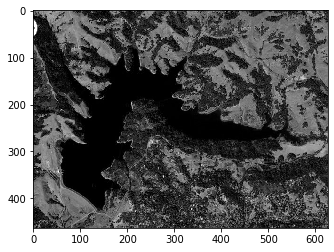

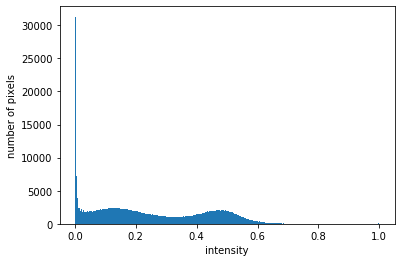

In [14]:
# Convert to greyscale
from skimage.color import rgb2gray
briones_bw = rgb2gray(briones)
plt.figure()
plt.imshow(briones_bw,cmap='gray')
plt.show()
plt.figure()
plt.hist(briones_bw.flatten(),256)
plt.xlabel('intensity')
plt.ylabel('number of pixels')
plt.show()

<IPython.core.display.Javascript object>


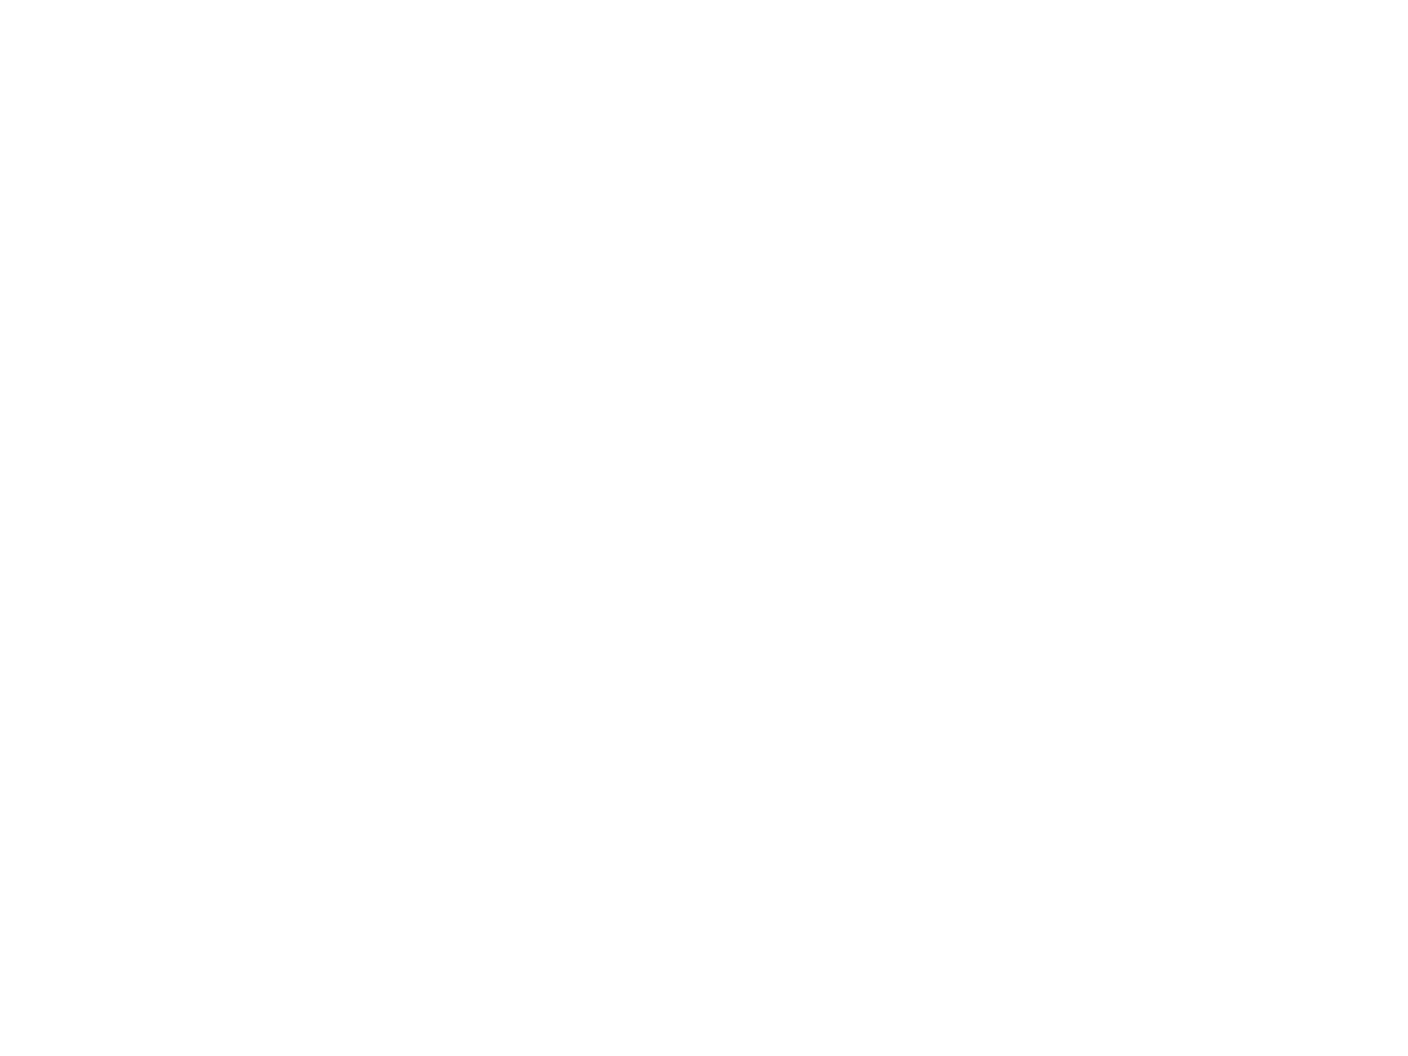

In [15]:
%matplotlib notebook
plt.figure()
plt.imshow(briones)
plt.show()

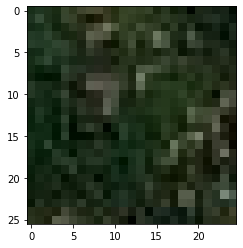

[ 34.72153846  47.72615385  28.64461538 255.        ]
[20.64411253 19.10107751 18.25793426  0.        ]


In [16]:
import numpy as np
%matplotlib inline
briones_roi = briones[175:201,364:389,:]
plt.figure()
plt.imshow(briones_roi)
plt.show()

mean_color = np.mean(briones_roi,axis=(0,1))
std_color = np.std(briones_roi,axis=(0,1))
print(mean_color)
print(std_color)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


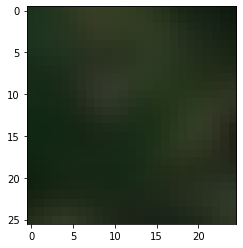

In [17]:
# Gaussian filter
roi_filt = filters.gaussian(briones_roi[:,:,:-1],sigma=2) # NOTE: throw out the alpha channel [:,:,-1]
plt.figure()
plt.imshow(roi_filt)
plt.show()

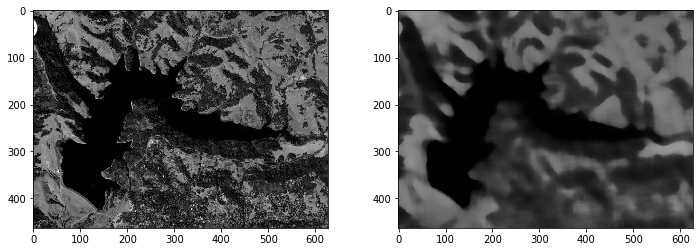

In [18]:
# Median filter - demonstrate on Greyscale Image
briones_medfilt = filters.median(briones_bw,np.ones((21,21)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(briones_bw,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(briones_medfilt,cmap='gray')
plt.show()

In [21]:
briones_bw.shape

(463, 627)